In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

#### Load the Dataset

In [2]:
data=pd.read_csv("wine_data.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Exploratery Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [6]:
missing_value=missing_val=data.isnull().sum()
missing_value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.corr()['quality']
data.corr()['quality'].abs() > .1
# TRY TO STORE THE FEATURE
highly_correlated_features = data.columns[data.corr()['quality'].abs() > .1]
highly_correlated_features

#DROP THE RESPONCE VARIABLE------------
highly_correlated_features = highly_correlated_features.drop('quality')
highly_correlated_features

Index(['fixed acidity', 'volatile acidity', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')

#### Data Visualization 

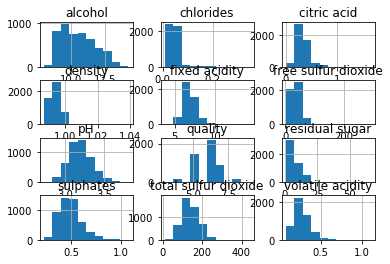

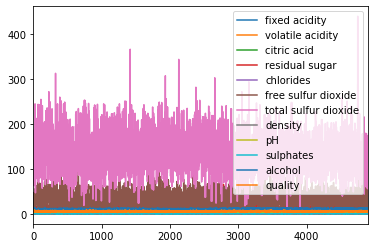

In [8]:
data.hist()
data.plot()

fixed acidity


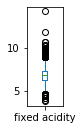

volatile acidity


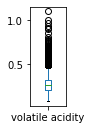

citric acid


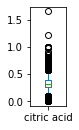

residual sugar


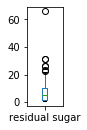

chlorides


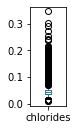

free sulfur dioxide


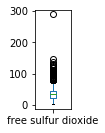

total sulfur dioxide


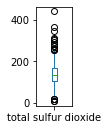

density


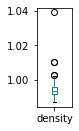

pH


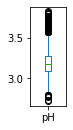

sulphates


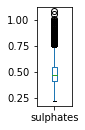

alcohol


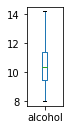

quality


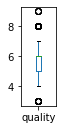

In [9]:
for i in data:
    print(i)
    data[i].plot(kind='box', subplots=True, layout=(2,8), sharex=False, sharey=False)
    plt.show()

fixed acidity


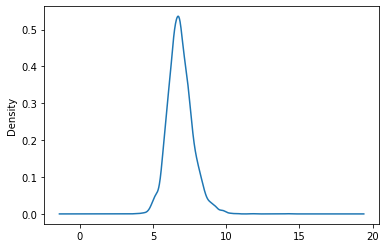

volatile acidity


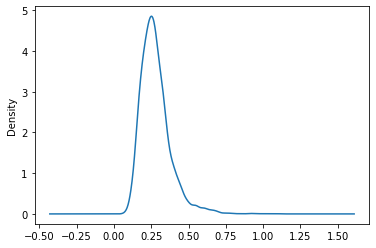

citric acid


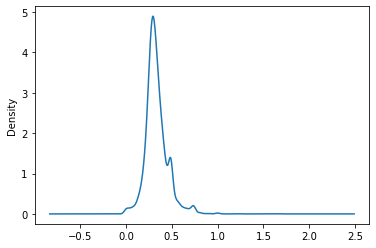

residual sugar


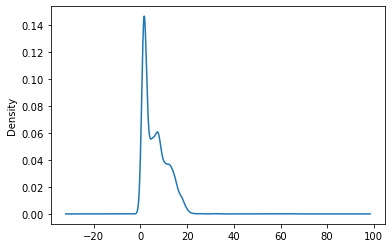

chlorides


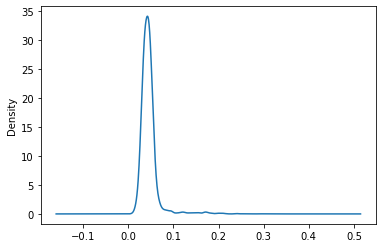

free sulfur dioxide


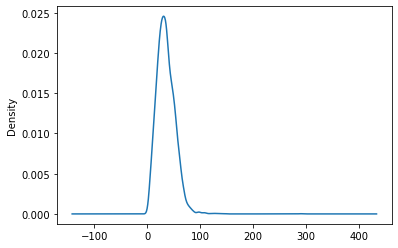

total sulfur dioxide


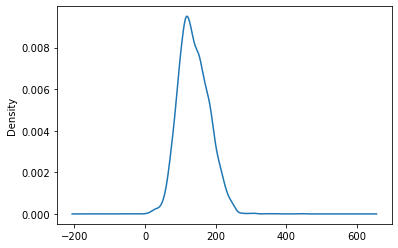

density


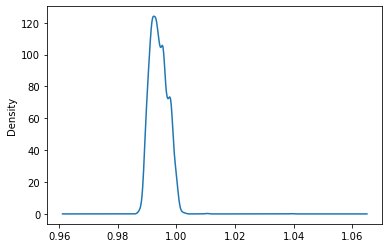

pH


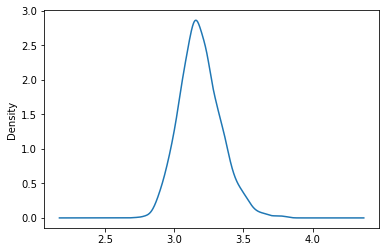

sulphates


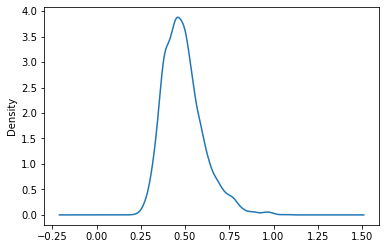

alcohol


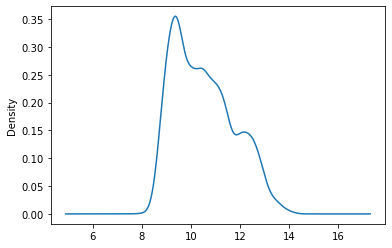

quality


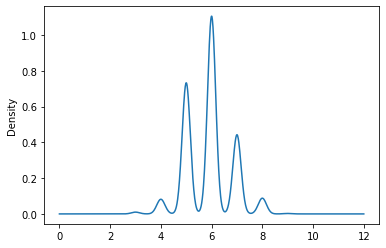

In [10]:
for i in data:
    #Density Plot
    print(i)
    data[i].plot.kde()
    plt.show()

In [11]:
#target variable is in last columns
y=data[data.columns[len(data.columns)-1]]
x = data.iloc[:, :-1].values

In [12]:
import statsmodels.api as sm
#using OLS method
LR=sm.OLS(y, x)
LR = LR.fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.707e+04
Date:                Fri, 12 Jul 2019   Prob (F-statistic):                        0.00
Time:                        12:48:44   Log-Likelihood:                         -5575.5
No. Observations:                4898   AIC:                                  1.117e+04
Df Residuals:                    4887   BIC:                                  1.124e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0506      0.015     -3.356      0.001      -0.080      -0.021
x2            -1.9585      0.114    -17.196      0.000      -2.182      -1.735
x3            -0.0293      0.096     -0.305      0.760      -0.218       0.159
x4             0.0250      0.003      9.642      0.000       0.020       0.030
x5            -0.9426      0.543     -1.736      0.083      -2.007       0.122
x6             0.0048      0.001      5.710      0.000       0.003       0.006
x7            -0.0009      0.000     -2.352      0.019      -0.002      -0.000
x8             2.0420      0.353      5.780      0.000       1.349       2.735
x9             0.1684      0.084      2.014      0.044       0.005       0.332
x10            0.4165      0.097      4.279      0.000       0.226       0.607
x11            0.3656      0.011     32.880      0.000       0.344       0.387
==============================================================================
Omnibus:                      108.883   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.495
Skew:                           0.064   Prob(JB):                     4.42e-52
Kurtosis:                       4.069   Cond. No.                     7.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
linreg = LogisticRegression()
linreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = linreg.predict(X_test)

In [16]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.51


#### Logostic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = logreg.predict(X_test)

In [19]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.51


In [20]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.532


In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0   0   5   4   0   0]
 [  0   0  30  29   1   0]
 [  0   0 203 254   1   0]
 [  0   0  94 526  10   0]
 [  0   0  11 240  16   0]
 [  0   0   0  41   5   0]]


In [22]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        60
           5       0.59      0.44      0.51       458
           6       0.48      0.83      0.61       630
           7       0.48      0.06      0.11       267
           8       0.00      0.00      0.00        46

    accuracy                           0.51      1470
   macro avg       0.26      0.22      0.20      1470
weighted avg       0.48      0.51      0.44      1470

